In [90]:
import numpy as np
world_alcohol = np.genfromtxt("/home/francis/Téléchargements/world_alcohol.csv", delimiter=',') #téléchargement du fichier csv

In [5]:
print(type(world_alcohol))

<class 'numpy.ndarray'>


In [7]:
print(world_alcohol.dtype)

float64


In [8]:
world_alcohol

array([[      nan,       nan,       nan,       nan,       nan],
       [1.986e+03,       nan,       nan,       nan, 0.000e+00],
       [1.986e+03,       nan,       nan,       nan, 5.000e-01],
       ...,
       [1.986e+03,       nan,       nan,       nan, 2.540e+00],
       [1.987e+03,       nan,       nan,       nan, 0.000e+00],
       [1.986e+03,       nan,       nan,       nan, 5.150e+00]])

In [91]:
import numpy as np
# ajout du parametre dtype = U75 pour affichage comprehensible
world_alcohol = np.genfromtxt("/home/francis/Téléchargements/world_alcohol.csv", delimiter=',', dtype = "U75")

In [92]:
world_alcohol

array([['Year', 'WHO region', 'Country', 'Beverage Types',
        'Display Value'],
       ['1986', 'Western Pacific', 'Viet Nam', 'Wine', '0'],
       ['1986', 'Americas', 'Uruguay', 'Other', '0.5'],
       ...,
       ['1986', 'Europe', 'Switzerland', 'Spirits', '2.54'],
       ['1987', 'Western Pacific', 'Papua New Guinea', 'Other', '0'],
       ['1986', 'Africa', 'Swaziland', 'Other', '5.15']], dtype='<U75')

In [93]:
#pour faire des opérations, on supprime l'entête avec le parametre skip_header=1
world_alcohol = np.genfromtxt("/home/francis/Téléchargements/world_alcohol.csv", delimiter=',', dtype = "U75", skip_header=1)
world_alcohol

array([['1986', 'Western Pacific', 'Viet Nam', 'Wine', '0'],
       ['1986', 'Americas', 'Uruguay', 'Other', '0.5'],
       ['1985', 'Africa', "Cte d'Ivoire", 'Wine', '1.62'],
       ...,
       ['1986', 'Europe', 'Switzerland', 'Spirits', '2.54'],
       ['1987', 'Western Pacific', 'Papua New Guinea', 'Other', '0'],
       ['1986', 'Africa', 'Swaziland', 'Other', '5.15']], dtype='<U75')

In [94]:
years_is_1984 = world_alcohol[:,0] == '1984'
years_1984 = world_alcohol[years_is_1984]
print(years_1984)

[['1984' 'Africa' 'Nigeria' 'Other' '6.1']
 ['1984' 'Eastern Mediterranean' 'Afghanistan' 'Other' '0']
 ['1984' 'Americas' 'Costa Rica' 'Wine' '0.06']
 ...
 ['1984' 'Europe' 'Latvia' 'Spirits' '7.5']
 ['1984' 'Africa' 'Angola' 'Wine' '0.57']
 ['1984' 'Africa' 'Central African Republic' 'Wine' '0.46']]


In [73]:
df_wine = world_alcohol[:,3] == 'Wine'
dfwine = world_alcohol[df_wine]
print(dfwine)

[['1986' 'Western Pacific' 'Viet Nam' 'Wine' '0']
 ['1985' 'Africa' "Cte d'Ivoire" 'Wine' '1.62']
 ['1987' 'Africa' 'Mauritius' 'Wine' '0.13']
 ...
 ['1985' 'Europe' 'Slovakia' 'Wine' '2.6']
 ['1984' 'Africa' 'Angola' 'Wine' '0.57']
 ['1984' 'Africa' 'Central African Republic' 'Wine' '0.46']]


In [95]:
import pandas as pd
df_wines = pd.DataFrame(dfwine) #convertion en dataframe
headers = ["years", "continent","country", "type_of_alcohol", "liters"] # définition de l'entête
df_wines.columns = headers # ajout de l'entête
df_wines


,years,continent,country,type_of_alcohol,liters
0,1986,Western Pacific,Viet Nam,Wine,0
1,1985,Africa,Cte d'Ivoire,Wine,1.62
2,1987,Africa,Mauritius,Wine,0.13
3,1987,Africa,Botswana,Wine,0.2
4,1987,Africa,Guinea-Bissau,Wine,0.07
...,...,...,...,...,...
811,1984,Western Pacific,Fiji,Wine,0.13
812,1984,Eastern Mediterranean,Djibouti,Wine,0.51
813,1985,Europe,Slovakia,Wine,2.6
814,1984,Africa,Angola,Wine,0.57


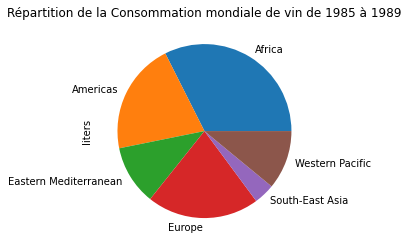

In [96]:

import matplotlib.pyplot as plt
df_wines['liters'] = pd.to_numeric(df['liters'], errors ='coerce') #convertir les str en float
df_wines_country = df_wines.groupby('continent', axis=0).sum() #création du camembert
df_wines_country['liters'].plot(kind='pie')
plt.title('Répartition de la Consommation mondiale de vin de 1985 à 1989')
plt.show()